In [9]:
# importing required modules 
from zipfile import ZipFile 
import datetime
import os
import shutil

file_name='IDD_Segmentation'
json_file_path='gtFine'
image_path='leftImg8bit'
temp_folder='All_data/New_data'

curret_label_path= os.path.join(file_name,json_file_path,'train')
curret_image_path= os.path.join(file_name,image_path,'train')
files_name=[]


for files in os.listdir(curret_image_path):
    list_file=os.path.join(curret_image_path,files)
    for file in os.listdir(list_file):
        new_file_name=str(file.split('_')[0])
        files_name.append(new_file_name)
        json_name=new_file_name+'_gtFine_polygons.json'
        #print(os.path.join(curret_label_path,files,json_name))
        shutil.copy(os.path.join(curret_image_path,files,file),  temp_folder) 
        shutil.copy(os.path.join(curret_label_path,files,json_name), temp_folder)
    


In [16]:
with open('file_names.txt', 'w') as filehandle:
    for listitem in files_name:
        filehandle.write('%s\n' % listitem)

In [9]:
files_name = []

# open file and read the content in a list
with open('file_names.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        files_name.append(currentPlace)

In [10]:
len(files_name)

6993

In [ ]:
train-70 --4895
val-10 --700
test-20 --1398

In [1]:
import numpy as np
import json
import cv2
from zipfile import ZipFile 
import datetime
import os
import shutil

with open('label_txt.txt') as file:
    label_to_color_map = json.load(file)

In [17]:
source_path=os.path.join('All_data','New_data') 

def creat_lables(input_path,output_path,image_no):
    get_json_file_path =os.path.join(source_path,image_no+'_gtFine_polygons.json') 
    get_image_file_path=os.path.join(source_path,image_no+'_leftImg8bit.png') 
    
    
    
    with open(get_json_file_path) as json_file:
        
        json_data = json.load(json_file)
       
        cur_img = cv2.imread(get_image_file_path,cv2.IMREAD_UNCHANGED)
        
        for i, obj in enumerate(json_data['objects']):
            obj_label = obj['label']
            color_tuple = tuple(label_to_color_map[obj_label])
            cv2.fillPoly(cur_img,[np.array(obj['polygon']).astype(np.int32)],color=color_tuple)
            
 
        cv2.imwrite(os.path.join(output_path,image_no+'_leftImg8bit.png'), cur_img)
        shutil.copy(get_image_file_path,  input_path)

In [18]:
for image_no in range(len(files_name)):
    
    if image_no >=0 and image_no<= 4895: #train
        input_path =os.path.join('datasets_all','input','train') 
        output_path=os.path.join('datasets_all','output','train')
        creat_lables(input_path,output_path,files_name[image_no])
        
    if image_no >=4896 and image_no<= 5595: #val
        input_path =os.path.join('datasets_all','input','val') 
        output_path=os.path.join('datasets_all','output','val')
        creat_lables(input_path,output_path,files_name[image_no])
        
    if image_no >=5596 and image_no<= 7000: #test
        input_path =os.path.join('datasets_all','input','test') 
        output_path=os.path.join('datasets_all','output','test')
        creat_lables(input_path,output_path,files_name[image_no])

In [10]:
import numpy as np
import tensorflow as tf

tt=np.array((1,2,3,3,4,6))[:3]

In [23]:
def load_image(path):
    image = cv2.cvtColor(cv2.imread(path,-1), cv2.COLOR_BGR2RGB)
    return image

In [ ]:
image_paths_train = glob('new_dataset/leftImg8bit/train/*_leftImg8bit.png')

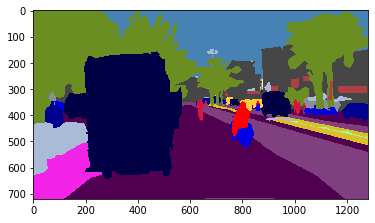

In [21]:
image = cv2.imread('datasets_all/output/val/000300_leftImg8bit.png', 1)
plt.imshow(image)
plt.show()

In [2]:
import numpy as np

label_values = np.array(
[[128, 64,128] ,
[250,170,160]  ,
[ 81,  0, 81]  ,
 [244, 35,232]  ,
[230,150,140]  ,
 [152,251,152]  ,
 [220, 20, 60]  ,
 [246, 198, 145],
 [255,  0,  0]  ,
 [  0,  0,230]  ,
 [119, 11, 32]  ,
 [255, 204, 54] ,
 [  0,  0,142]  ,
 [  0,  0, 70]  ,
 [  0, 60,100]  ,
 [  0,  0, 90]  ,
 [  0,  0,110]  ,
[  0, 80,100]  ,
[136, 143, 153],  
 [220, 190, 40],
 [102,102,156]  ,
[190,153,153]  ,
 [180,165,180]  ,
 [174, 64, 67] ,
 [220,220,  0]  ,
 [250,170, 30]  ,
 [153,153,153]  ,
 [153,153,153]  ,
 [169, 187, 214] ,  
 [ 70, 70, 70]  ,
 [150,100,100]  ,
 [150,120, 90]  ,
 [107,142, 35]  ,
 [ 70,130,180]  ,
  [169, 187, 214],
  [  0,  0,  0]  ,
  [  0,  0,  0]  ,
  [  0,  0,  0]  ,
  [  0,  0,  0]  ,
  [  0,  0,142]  ], np.uint8)